## Object Recognition

"Striving For Simplicity: The All Convolutional Net".  This paper can be found at the following link:

https://arxiv.org/pdf/1412.6806.pdf

The dataset we will be using is the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

### 1. Loading the Data

In [17]:
#import keras
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import tensorflow.keras.utils 
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [9]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [10]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


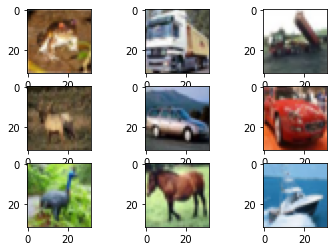

In [11]:
for i in range(0,9):
    plt.subplot(330+1+i)
    img = X_train[i]
    plt.imshow(img)
    
plt.show()

### 2. Preprocessing the dataset

1 . Normalize the images. 

2 . Converting our class labels to one-hot vectors.

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [18]:
Y_train = tensorflow.keras.utils.to_categorical(y_train)
Y_test = tensorflow.keras.utils.to_categorical(y_test)

print(Y_train.shape)

(50000, 10)


In [19]:
print(Y_train.shape)
print(Y_train[0])

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]



### 3. Building the All-CNN


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Activation, Conv2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD

In [23]:
def allcnn(weights=None):
    model = Sequential()

    # add model layers - Convolution2D, Activation, Dropout
    model.add(Conv2D(96, (3, 3), padding = 'same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding = 'valid'))

    # add GlobalAveragePooling2D layer with Softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    # load the weights
    if weights:
        model.load_weights(weights)
    
    return model

import os
os.environ['THEANO_FLAGS'] = 'optimizer=None'
    
    

### 4. Defining Parameters and Training the Model


In [24]:
# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)

sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

print (model.summary())

epochs = 350
batch_size = 32

scores = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 96)        2688      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 192)       1

Accuracy: 90.88%


### 6. Making Predictions

In [25]:
# make dictionary of class labels and names
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

9/1 [==============================================================================================================================================================================================================================================================================] - 0s 11ms/sample


In [27]:
print (predictions)

[[4.5647234e-18 1.0580984e-20 1.8923278e-10 2.1411404e-11 9.9999928e-01
  2.8037445e-07 3.1478669e-13 4.2381450e-07 1.3699557e-19 1.2097067e-18]
 [2.1190902e-16 2.0386626e-17 1.5672676e-09 5.3581510e-07 1.6256110e-10
  9.9999940e-01 1.6712491e-09 2.0782188e-08 3.6548053e-15 3.5128330e-16]
 [1.2720517e-30 5.0274027e-28 5.1540022e-24 3.6051544e-21 1.0875264e-27
  8.1522779e-22 1.0000000e+00 1.1050993e-27 6.1924619e-32 1.2274381e-23]
 [1.5143771e-16 4.7668694e-18 2.2583695e-09 1.0000000e+00 4.3481128e-11
  1.6884179e-12 4.5317125e-13 2.6686954e-16 7.2659426e-19 6.2049710e-17]
 [8.2502348e-36 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 9.3568045e-36 8.6868626e-30 8.2192576e-22]
 [5.9699731e-24 1.0000000e+00 7.5485268e-27 8.0228679e-27 1.9714101e-30
  2.7338925e-29 7.2188490e-31 5.5680368e-27 1.6186991e-26 1.1906196e-13]
 [6.4563792e-18 2.9642424e-20 1.0046514e-11 9.9999988e-01 6.0156128e-13
  9.1111502e-08 7.8874797e-12 1.1608745e-15 7.8588063e-21 

In [28]:
for image in predictions:
    print(np.sum(image))

1.0
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [30]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[4 5 6 3 1 1 3 6 8]


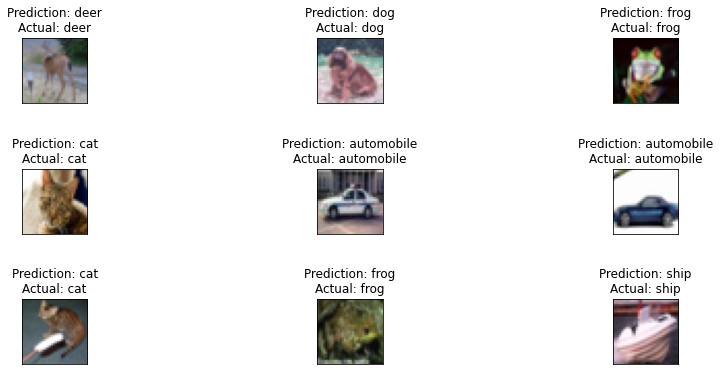

In [33]:
# create a grid of 3x3 images
fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):

    # determine label for each prediction, set title
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()